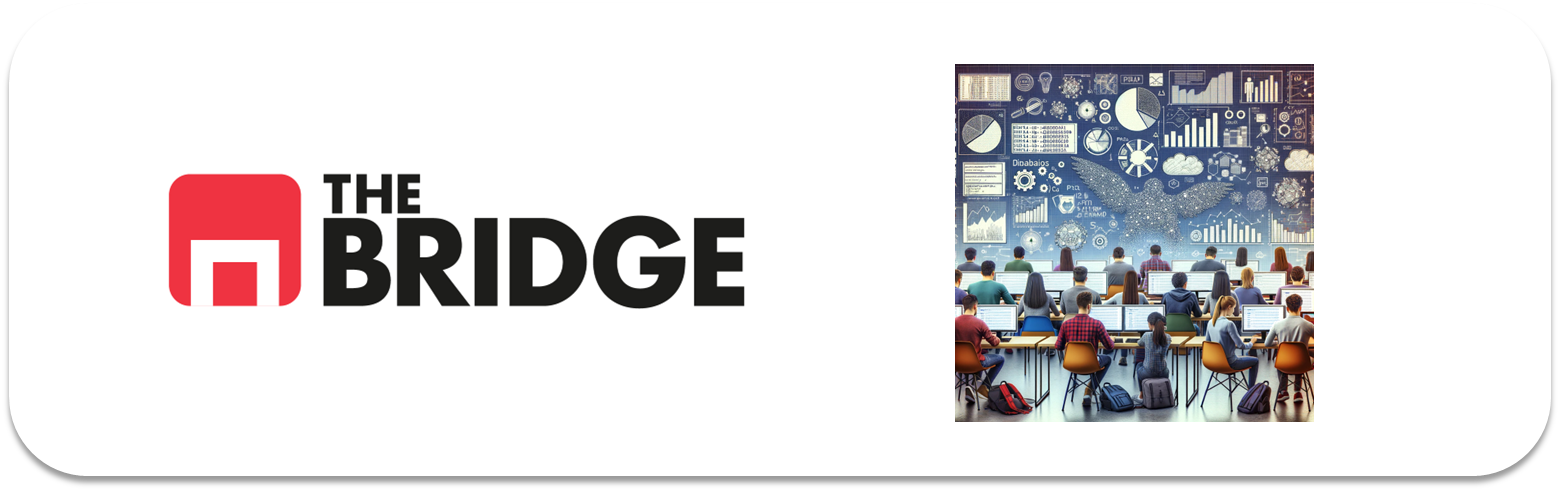

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



Importar librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

Cargar dataset

In [2]:
df = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep = '|')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Escoger y analizar variable target 

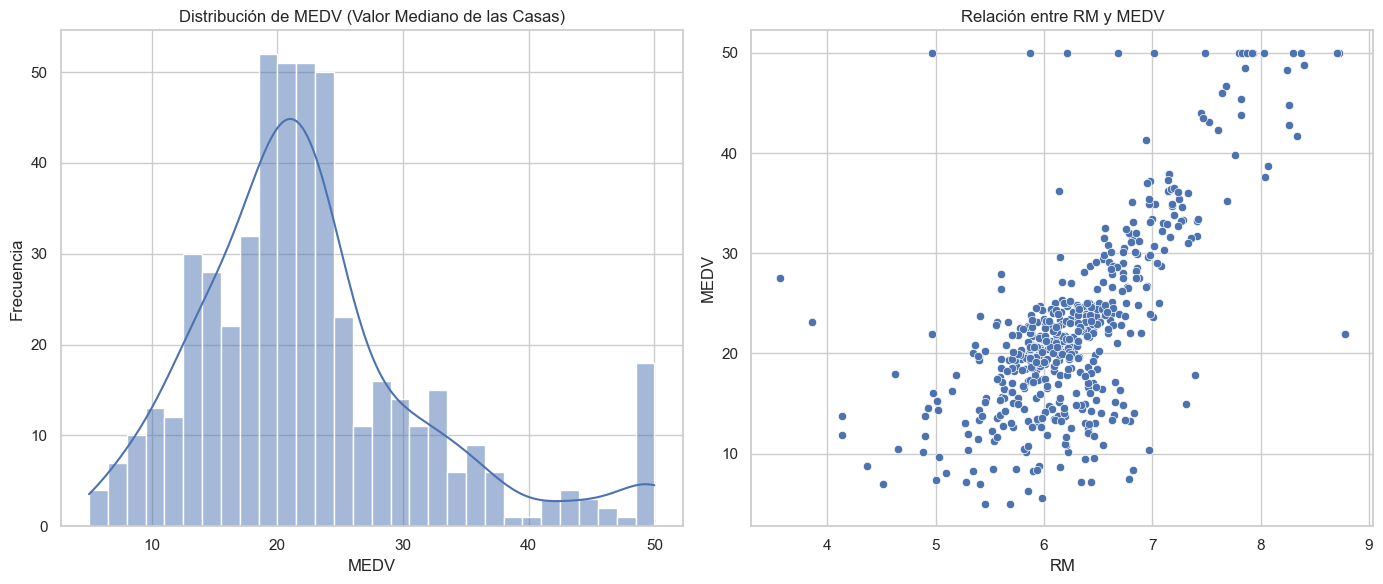

In [17]:
# Crear una figura para los gráficos
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

# Histograma de la variable target MEDV
sns.histplot(df['MEDV'], bins = 30, kde = True, ax = ax[0])
ax[0].set_title('Distribución de MEDV (Valor Mediano de las Casas)')
ax[0].set_xlabel('MEDV')
ax[0].set_ylabel('Frecuencia')

# Scatter plot de MEDV contra RM (número promedio de habitaciones por vivienda)
sns.scatterplot(x = df['RM'], y = df['MEDV'], ax = ax[1])
ax[1].set_title('Relación entre RM y MEDV')
ax[1].set_xlabel('RM')
ax[1].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

Definir X e y - Split en test y train

In [24]:
from sklearn.model_selection import train_test_split

# Definir la variable target y las características
target = 'MEDV'
X = df.drop(target, axis = 1)
y = df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
print(X_train.shape) 
print(X_test.shape )
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354,)
(152,)


Mini - EDA

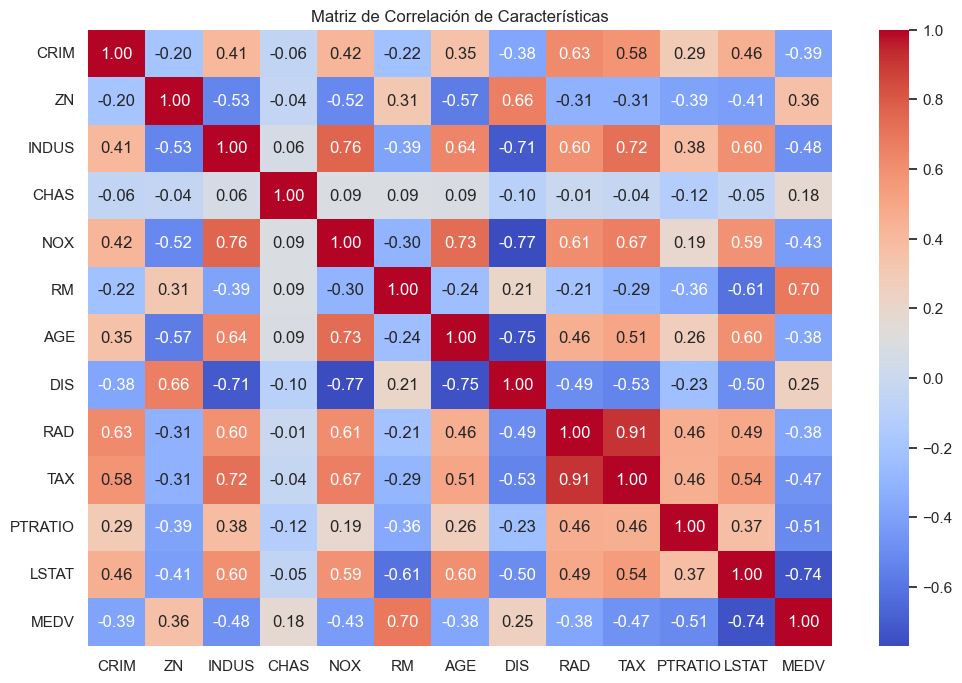

In [28]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Características')
plt.show()



Conclusiones:
- RM tiene una fuerte correlacion positiva con el targe, es decir, a mas habitaciones, el valor de la vivienda aumentara.
- LSTAT tiene una fuerte correlacion negativa con el target, lo que sugiere que a mayor % de poblacion de menor estatus en el area, menor es el valor de las viviendas. 
- PTRATIO / INDUS / TAX muetran tambien una correlacion negativa significativa. 

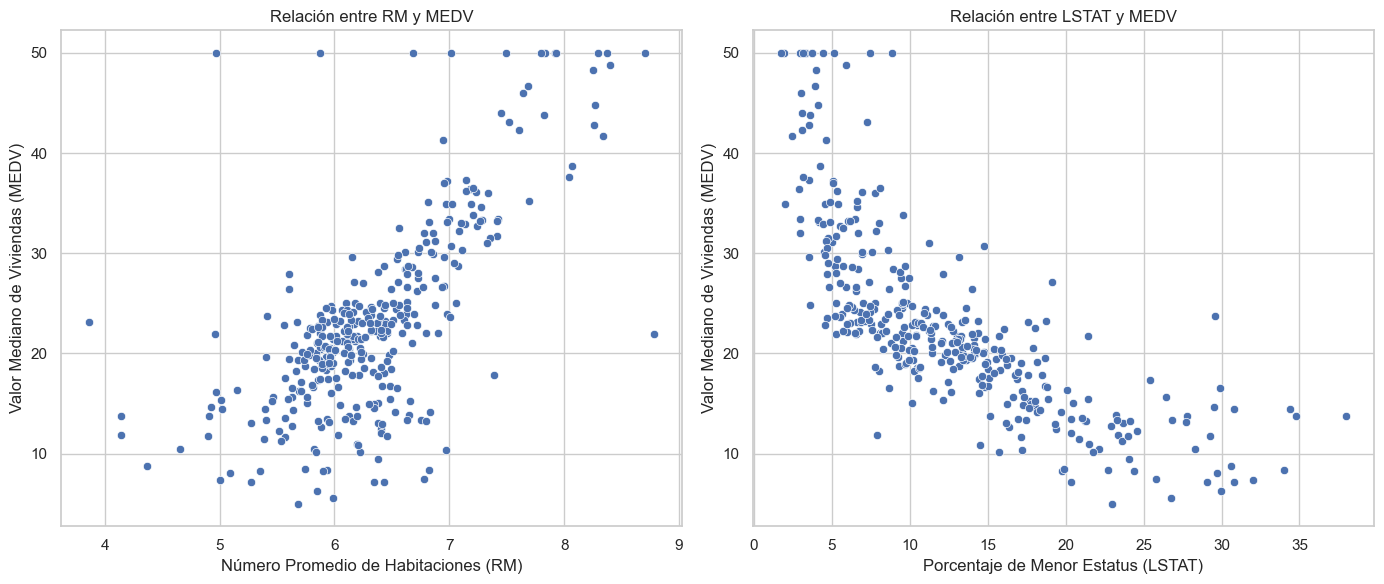

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersión de RM vs. MEDV
sns.scatterplot(x=X_train['RM'], y=y_train, ax=ax[0])
ax[0].set_title('Relación entre RM y MEDV')
ax[0].set_xlabel('Número Promedio de Habitaciones (RM)')
ax[0].set_ylabel('Valor Mediano de Viviendas (MEDV)')

# Gráfico de dispersión de LSTAT vs. MEDV
sns.scatterplot(x=X_train['LSTAT'], y=y_train, ax=ax[1])
ax[1].set_title('Relación entre LSTAT y MEDV')
ax[1].set_xlabel('Porcentaje de Menor Estatus (LSTAT)')
ax[1].set_ylabel('Valor Mediano de Viviendas (MEDV)')

plt.tight_layout()
plt.show()


Conclusiones:
- RM y MEDV: Hay una tendencia positiva, muestras que al aumentar el numero de habitaciones, tambien aumenta el valor medio de las viviendas. Se observan valores atipicos, sobre todo en viviendas con un alto numero de habitaciones. 
- LSTAT y MEDV: Hay una relacion negativa fuerte y clara. A medida que aumenta el % de poblacion de menor estatus, el valor disminuye. 

Construir un modelo de regresion lineal con RM y LSTAT

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelo = LinearRegression()

features = ['RM', 'LSTAT']
X_train_selected = X_train[features]
X_test_selected = X_test[features]

modelo.fit(X_train_selected, y_train)

LinearRegression()

In [34]:
y_pred = modelo.predict(X_test_selected)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f'El MAE (Error Absoluto Medio) es: {mae}')
print(f'El MSE (Eror Cuadratico Medio) es: {mse}')
print(f'El RMSE (Raiz MSE) es: {rmse}')
print(f'El R2 (Coeficiente de Determinacion) es: {r2}')

El MAE (Error Absoluto Medio) es: 4.0880457454485155
El MSE (Eror Cuadratico Medio) es: 29.816277731842458
El RMSE (Raiz MSE) es: 5.46042834691954
El R2 (Coeficiente de Determinacion) es: 0.5998518447715597


Conclusiones:
- El MAE indica que, en promedio, las predicciones del modelo difieren del valor real en aprox. 4,088 $.
- El RMSE es mas elevado que el MAE, es decir algunos errores son mas grandes. 
- El R2 significa que el modelo puede explicar casi el 60 % de la variabilidad de los datos. 

Comparar graficamente las predicciones

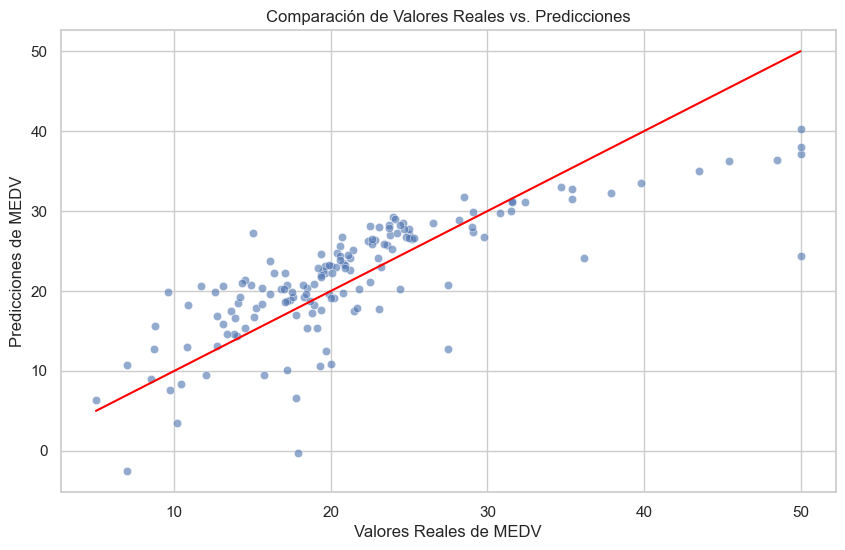

In [43]:
plt.figure(figsize = (10, 6))

sns.scatterplot(x = y_test, y = y_pred, alpha = 0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')

plt.title('Comparación de Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales de MEDV')
plt.ylabel('Predicciones de MEDV')
plt.grid(True)

plt.show()

Regularizacion

In [45]:
alphas = [0.1, 1, 10]
ridge_results = []

for alpha in alphas:
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train_selected, y_train)
    y_pred_ridge = ridge_model.predict(X_test_selected)

    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    ridge_results.append({
        'alpha': alpha,
        'MAE': mae_ridge,
        'MSE': mse_ridge,
        'RMSE': rmse_ridge,
        'R2': r2_ridge
    })

ridge_results


[{'alpha': 0.1,
  'MAE': 4.088360906515364,
  'MSE': 29.81730245151984,
  'RMSE': 5.460522177550407,
  'R2': 0.5998380925623733},
 {'alpha': 1,
  'MAE': 4.091172163941702,
  'MSE': 29.826923344321884,
  'RMSE': 5.461403056387789,
  'R2': 0.5997089757577536},
 {'alpha': 10,
  'MAE': 4.117580094951106,
  'MSE': 29.95571458346974,
  'RMSE': 5.4731813950818164,
  'R2': 0.5979805381164729}]

#### ANALISIS Y CONCLUSIONES

El modelo inicial, con las variables RM y LTSAT, muestra un R2 del 0,6. Indica que puede explicar el 60 % de la variabilidad en los precios. 
Los valores del MAE y RMSE sueron 4,088 y 5,460 respectivamente. 
La regularizacion Ridge con valores (0.1, 1, 10), muestra cambios minimos en las metricas. El modelo original no hay mucho overfiitting ya que una regularización más fuerte no mejoró el rendimiento, e incluso lo redujo ligeramente.
Por que el Ridge con 0.1 mantiene un resultado similiar al de sin regularizacion, es el modelo que elegiria. Proporciona un buen equilibrio entre mantener la capacidad predictiva y agregar una capac de proteccion contra posibles variaciones. 